# Семинар 8
# Понятия оракула, итерационных методов. Скорость сходимости. Линейный поиск

## Постановка задачи (общая)

\begin{equation*}
\begin{split}
  & \min_{x \in \mathbb{R}^n} f(x) &\\
  \text{s.t.  } & g_{i}(x) \leq 0, \;\;\; & i = 1,...,m\\
   & h_{j}(x) = 0, & j = 1,...,p\\
\end{split}
\end{equation*}

Известны некоторые необходимые и/или достаточные условия. Тогда зачем нужны итерационные методы?

### Итерационные методы

Как правило, методы генерируют бесконечную последовательность приблеженных решений $\{ x_t \}$, которая за конечное количество шагов сходится к оптимальному (хотя бы к одному из оптимальных) решению $x_*$.

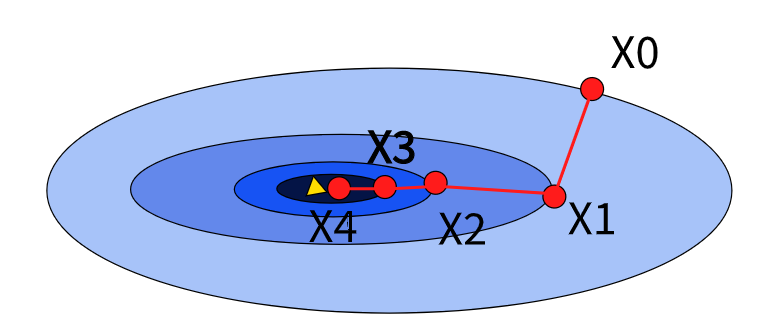

Общая схема итерационных методов:

In [ ]:
def General_Scheme(x, epsilon):
    while not Stop_Criterion(x, epsilon):
        Oracle_Response = Request_Oracle(x)
        x = Next_Point(x, Oracle_Response)
    return x

### Концепция Оракула (Черного ящика)

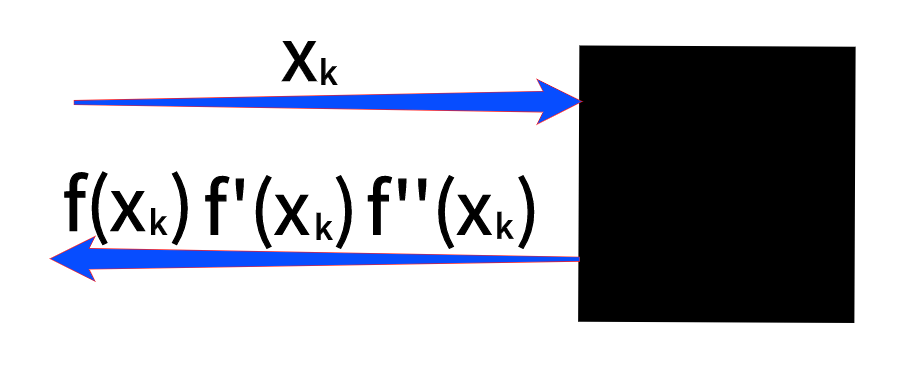

### Критерии остановки



*  Сходимость по аргументу:

\begin{equation*}
  \| x_k - x_* \|_2 < \varepsilon
\end{equation*}

*  Сходимость по функции:

\begin{equation*}
  \| f_k - f^* \|_2 < \varepsilon
\end{equation*}

*  Выполнение необходимого условия:

\begin{equation*}
  \| f'(x_k) \|_2 < \varepsilon
\end{equation*}




Но $x_*$ и $f^* = f(x_*)$  не известны!


Тогда можно использовать следующий трюк:

\begin{equation*}
  \| x_{k+1} - x_{k} \| = \| x_{k+1} - x_{k} + x_* - x_* \| \leq \| x_{k+1} - x_* \| + \| x_k - x_{*} \| \leq 2 \varepsilon 
\end{equation*}

**Замечание**: лучше использовать относительные изменения этих величин, например

\begin{equation*}
  \frac{\| x_{k+1} - x_{k} \|}{\| x_k \| }
\end{equation*}

### Локальный характер методов

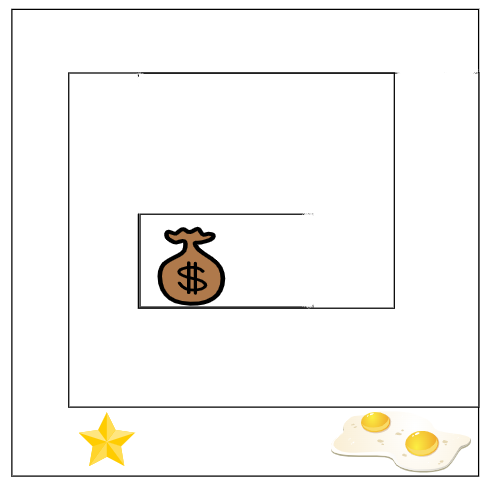

## Скорость сходимости

*Как сравнивать методы оптимизации?* 

Для заданного класса задач сравнивают следующие величины:


1.   Арифметическая сложность: общее число всех вычислений, неоюходимых для решения задачи с точностью $\varepsilon$;
2.   Скорость сходимости;
3.   Эксперименты.



Для того, чтобы сравнивать производительность алгоритмов, необходимо определить терминологию для различных типов сходимости. Пусть $\{ x_k \}$ -- последовательность в $\mathbb{R}^n$, которая сходится к некоторой точке $x_*$.



1.   Сублинейная

      \begin{equation*}
        \| x_{k+1} -  x_* \| \leq Ck^q
      \end{equation*}

      где $\alpha < 0$ и $0 < C < \infty$.

2.   Линейная (геометрическая прогрессия)

      \begin{equation*}
        \| x_{k+1} -  x_* \| \leq Cq^k
      \end{equation*}

      где $q \in (0,1)$ и $0 < C < \infty$.

3.   Сверхлинейная

      \begin{equation*}
        \| x_{k+1} -  x_* \| \leq Cq^{k^p}
      \end{equation*}

      где $q \in (0,1)$, $0 < C < \infty$ и $p > 1$.

4.   Квадратичная

      \begin{equation*}
        \| x_{k+1} -  x_* \| \leq Cq^{2^k}
      \end{equation*}

      где $q \in (0,1)$, $0 < C < \infty$.


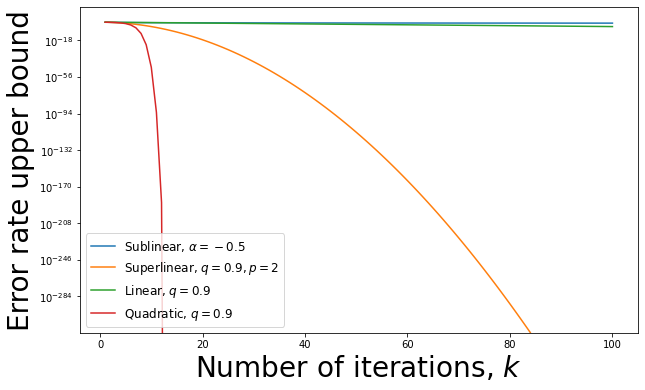

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
C = 10
alpha = -0.5
q = 0.9
num_iter = 100
sublinear = np.array([C * k**alpha for k in range(1, num_iter + 1)])
linear = np.array([C * q**k for k in range(1, num_iter + 1)])
superlinear = np.array([C * q**(k**2) for k in range(1, num_iter + 1)])
quadratic = np.array([C * q**(2**k) for k in range(1, num_iter + 1)])
plt.figure(figsize=(10,6))
plt.semilogy(np.arange(1, num_iter+1), sublinear, 
             label=r"Sublinear, $\alpha = -0.5$")
plt.semilogy(np.arange(1, num_iter+1), superlinear, 
             label=r"Superlinear, $q = 0.9, p=2$")
plt.semilogy(np.arange(1, num_iter+1), linear, 
             label=r"Linear, $q = 0.9$")
plt.semilogy(np.arange(1, num_iter+1), quadratic, 
             label=r"Quadratic, $q = 0.9$")
plt.xlabel("Number of iterations, $k$", fontsize=28)
plt.ylabel("Error rate upper bound", fontsize=28)
plt.legend(loc="best", fontsize=12)
plt.show()


### Как определить тип сходимости?

**Root test**

Пусть $\{ r_k \}_{k=m}^\infty$ является последовательность неотрицательных чисел, сходящаяся к нулю, и пусть

\begin{equation*}
  q = \lim_{k→\infty} \sup_{k} r_{k}^{1/k}
\end{equation*}



*   Если $0 \leq q < 1$, то $\{ r_k \}_{k=m}^\infty$ имеет линейную скорость сходимости с константой $q$;
*   В частности, если $q = 0$, то $\{ r_k \}_{k=m}^\infty$ имеет сверхлинейную скорость сходимости;
*   Если $q = 1$, то $\{ r_k \}_{k=m}^\infty$ имеет сублинейную скорость сходимости;
*   Случай $q > 1$ невозможен.



**Ratio test**

Пусть $\{ r_k \}_{k=m}^\infty$ является последовательность неотрицательных чисел, сходящаяся к нулю, и пусть

\begin{equation*}
  q = \lim_{k→\infty} \frac{r_{k+1}}{r_{k}}
\end{equation*}



*   Если существует $q$ и $0 \leq q < 1$, то $\{ r_k \}_{k=m}^\infty$ имеет линейную скорость сходимости с константой $q$;
*   В частности, если $q = 0$, то $\{ r_k \}_{k=m}^\infty$ имеет сверхлинейную скорость сходимости;
*   Если $\lim_{k→\infty} \frac{r_{k+1}}{r_{k}}$ не существет, но при этом $\alpha:= \lim \sup_{k→\infty} \frac{r_{k+1}}{r_{k}} < 1$, то $\{ r_k \}_{k=m}^\infty$ имеет линейную скорость сходимости с константой, не превосходящей $\alpha$;
*   Если $\lim \inf_{k→\infty} \frac{r_{k+1}}{r_{k}} = 1$, то $\{ r_k \}_{k=m}^\infty$ имеет сублинейную скорость сходимости;
*   Ситуация с $\lim \inf_{k→\infty} \frac{r_{k+1}}{r_{k}} > 1$ невозможна;
*   Во всех остальных случаях нельзя утверждать что-либо конкретное о скорости сходимости.



## Методы решений одномерных задач (Линейный поиск)

Предположим, что у нас есть задача минимизации функции $f(x): \mathbb{R} \rightarrow \mathbb{R}$ скалярной переменной:
$$
f(x) \rightarrow \min_{x \in \mathbb{R}}
$$

В дальнейшем будем рассматривать аналогичную задачу поиска минимума на отрезке $[a,b]$:
$$
f(x) \rightarrow \min_{x \in [a,b]}
$$



Задача линейного поиска -- одна из простейших задач оптимизации, однако она является важным звеном в решении более сложных задач, поэтому очень важно решать его эффективно. Ограничим класс рассматриваемых задач, где $f(x)$ -- ***унимодальная функция***.

Функция $f(x)$ называется *унимодальной* на отрезке $[a,b]$, если существует $x_{*} \in [a,b]$, что $f(x_1) > f(x_2) \;\;\; \forall a \leq x_1 < x_2 < x_*$ и $f(x_1) < f(x_2) \;\;\; \forall x_{*} < x_1 <x_2 \leq b$.

### **Ключевое свойство унимодальных функций**

Пусть $f(x)$ унимодальная функция на отрезке $[a,b]$. Тогда если $x_1 < x_2 \in [a,b]$, то:



*   если $f(x_1) \leq f(x_2) \rightarrow x_* \in [a, x_2]$
*   если $f(x_1) \geq f(x_2) \rightarrow x_* \in [x_1, b]$



### Бинарный поиск (метод Дихотомии)

**Идея:** Разделим отрезок на две равные части и выберем ту, которая содержит решение задачи с помощью значений функций.

**Алгоритм:**



In [ ]:
def binary_search(f, a, b, epsilon):
    c = (a + b) / 2
    while abs(b - a) > epsilon:
        y = (a + c) / 2.0
        if f(y) <= f(c):
            b = c
            c = y
        else:
            z = (b + c) / 2.0
            if f(c) <= f(z):
                a = y
                b = z
            else:
                a = c
                c = z
    return c

**Bounds**

Длина отрезка на $k+1$-й итерации:
$$ \Delta_{k+1} = b_{k+1} - a_{k+1} = \frac{1}{2^{k}} (b-a)$$

Для унимодальных функций это выполняется, если мы выбираем середину отрезка в качестве выхода функции $x_{k+1}$:
$$ | x_{k+1} - x_* |  \leq \frac{\Delta_{k+1}}{2} \leq \frac{1}{2^{k+1}} (b-a) \leq (0.5)^{k+1} \cdot (b-a)$$

Следует обратить внимание, что на каждой итерации мы обращаетмся к оракулу не более 2 раз, поэтому количество вычислений функций равно $N = 2k$, откуда следует:
$$ |x_{k+1} - x_{*}| \leq (0.5)^{\frac{N}{2}+1} \cdot (b-a) \leq (0.707)^N \frac{b-a}{2} $$

Приравняя правую часть к $\varepsilon$, мы получим количество итераций метода, необходимых для достижения точности $\varepsilon$:
$$k = \left[ \log_2 \frac{b-a}{\varepsilon} - 1 \right]$$

### Метод золотого сечения

**Идея:** Идея очень похожа на метод дихотомии. На отрезке прямой есть две золотые точки (левая и правая), и проницательная идея состоит в том, что на следующей итерации одна из точек останется золотой точкой.

**Алгоритм:**



In [ ]:
def golden_search(f, a, b, epsilon):
    tau = (sqrt(5) + 1) / 2
    y = a + (b - a) / tau**2
    z = a + (b - a) / tau
    while b - a > epsilon:
        if f(y) <= f(z):
            b = z
            z = y
            y = a + (b - a) / tau**2
        else:
            a = y
            y = z
            z = a + (b - a) / tau
    return (a + b) / 2

**Bounds**

$$| x_{k+1} - x_* | \leq b_{k+1} - a_{k+1} = \left( \frac{1}{\tau} \right)^{N-1} (b-a) \approx 0.618^k (b-a), $$

где $\tau = \frac{\sqrt{5} + 1}{2}.$

### Реализация сравнения алгоритмов

🤓 We'll compare ['binary search', 'golden search', 'parabolic search'] on the Inverse Maxwell function on the [0, 6] interval
🤓 Binary search: 23 function calls. 13 iterations. f = 0.71 (For error: 0.001)
🤓 Golden search: 20 function calls. 19 iterations. f = 0.71 (For error: 0.001)
🤓 Parabolic search: 17 function calls. 14 iterations. f = 0.71 (For error: 0.001)


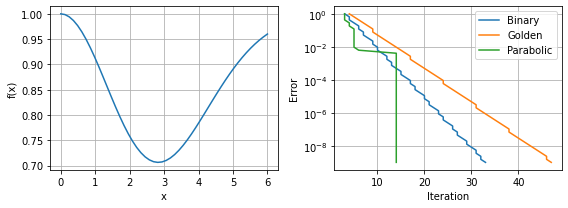

In [18]:
#@title Линейный поиск для унимодальных функций. Сравнение алгоритмов { run: "auto" }
#===== Libraries =====#
from scipy.optimize import OptimizeResult
from scipy.optimize import minimize
import numpy as np
from matplotlib import pyplot as plt
import math

#===== Algorithms =====#
def callback(xk, f, funs, xs, loc_lens):
    funs.append(f(xk))
    xs.append(xk)
    loc_lens.append(x_b - x_a)

def binary_search(fun, x0, args=(), maxfev=None,
        maxiter=100, callback=None, **options):
    tol, x_a, x_b = options['tol'], options['x_a'], options['x_b']
    x_best = x0
    funcalls = 1
    niter = 0
    stop = False
    success = False

    while not stop and niter < maxiter:
        niter += 1
        x_c = (x_a + x_b) / 2
        x_y = (x_a + x_c) / 2
        funcalls += 1
        if fun(x_y) <= fun(x_c):
            x_b = x_c
            x_c = x_y
        else:
            x_z = (x_b + x_c) / 2
            funcalls += 1
            if fun(x_c) <= fun(x_z):
                x_a = x_y
                x_b = x_z
            else:
                x_a = x_c
                x_c = x_z

        x_best = x_c
        f_best = fun(x_c)
        
        if callback is not None:
            callback(x_best)
        
        if (x_b - x_a < tol):
            success = True

        if (maxfev is not None and funcalls >= maxfev) or (x_b - x_a < tol):
            stop = True
            break

        
    return OptimizeResult(fun=f_best, x=x_best, nit=niter,
                          nfev=funcalls, success=success)

def golden_search(fun, x0, args=(), maxfev=None,
        maxiter=100, callback=None, **options):
    tol, x_a, x_b = options['tol'], options['x_a'], options['x_b']
    x_best = x0
    funcalls = 1
    niter = 0
    stop = False
    success = False

    while not stop and niter < maxiter:
        niter += 1
        tau = (np.sqrt(5) + 1) / 2.0
        x_y = x_a + (x_b - x_a) / tau**2
        x_z = x_a + (x_b - x_a) / tau
        funcalls += 1
        if fun(x_y) <= fun(x_z):
            x_b = x_z
            x_z = x_y
            x_y = x_a + (x_b - x_a) / tau**2
        else:
            x_a = x_y
            x_y = x_z
            x_z = x_a + (x_b - x_a) / tau

        x_best = x_z
        f_best = fun(x_z)
        
        if callback is not None:
            callback(x_best)
        
        if (x_b - x_a < tol):
            success = True

        if (maxfev is not None and funcalls >= maxfev) or (x_b - x_a < tol):
            stop = True
            break

    return OptimizeResult(fun=f_best, x=x_best, nit=niter,
                          nfev=funcalls, success=success)
    
def parabolic_search(fun, x0, args=(), maxfev=None,
        maxiter=100, callback=None, **options):
    tol, x_a, x_b = options['tol'], options['x_a'], options['x_b']
    x1, x2, x3 = x_a, (x_a + x_b)/2, x_b
    x_best = x2
    funcalls = 3
    niter = 0
    stop = False
    success = False

    f1, f2, f3 = fun(x1), fun(x2), fun(x3)

    while not stop and niter < maxiter:
        funcalls += 1
        niter += 1

        u = x2 - ((x2 - x1)**2*(f2 - f3) - (x2 - x3)**2*(f2 - f1))/(2*((x2 - x1)*(f2 - f3) - (x2 - x3)*(f2 - f1)))
        fu = fun(u)

        if x2 <= u:
            if f2 <= fu:
                x1, x2, x3 = x1, x2, u
                f1, f2, f3 = f1, f2, fu
            else:
                x1, x2, x3 = x2, u, x3
                f1, f2, f3 = f2, fu, f3
        else:
            if fu <= f2:
                x1, x2, x3 = x1, u, x2
                f1, f2, f3 = f1, fu, f2
            else:
                x1, x2, x3 = u, x2, x3
                f1, f2, f3 = fu, f2, f3

        x_best = (x1 + x3)/2

        if callback is not None:
            callback(x2)
        
        if (abs(x3 - x1) < tol):
            success = True

        if (maxfev is not None and funcalls >= maxfev) or (abs(x3 - x1) < tol):
            stop = True
            break

    return OptimizeResult(fun=fun(x_best), x=x_best, nit=niter,
                          nfev=funcalls, success=success)

#===== Functions =====#
# "sin(sin(sin(sqrt(x/2))))"
f_1 = lambda x: np.sin(np.sin(np.sin(np.sqrt(x/2)))) + 1

# 'Inverse Maxwell'
def inverse_maxwell(x, a):
    return -np.sqrt(2/math.pi) * x**2*np.exp(-x**2/(2*(a)**2))/(a)**3
f_2 = lambda x: inverse_maxwell(x, 2) + 1 

# "(x - 2) * x * (x + 2)**2"
f_3 = lambda x: (x - 2) * x * (x + 2)**2 + 10 

def callback(xk, f, funs, xs):
    funs.append(f(xk))
    xs.append(xk)
#===== Input reading =====#
optimizers = []
Binary_search = True #@param {type:"boolean"}
Golden_search = True #@param {type:"boolean"}
Parabolic_search = True #@param {type:"boolean"}
if Binary_search:
    optimizers.append('binary search')
if Golden_search:
    optimizers.append('golden search')
if Parabolic_search:
    optimizers.append('parabolic search')

Function = 'Inverse Maxwell' #@param ['Inverse Maxwell', "sin(sin(sin(sqrt(x/2))))", "(x - 2) * x * (x + 2)**2"] 
a = 0 #@param {type:"slider", min:-5, max:5, step:1}
b = 6 #@param {type:"slider", min:0, max:10, step:1}
tolerance = 1e-3
tolerances_bound =  1e-9#@param {type:"number"}
tolerances = np.logspace(np.log10(tolerances_bound), 0)
print(f"🤓 We'll compare {optimizers} on the {Function} function on the [{a}, {b}] interval")

if Function == 'Inverse Maxwell':
    func = f_2
elif Function == 'sin(sin(sin(sqrt(x/2))))':
    func = f_1
elif Function == '(x - 2) * x * (x + 2)**2':
    func = f_3

x = np.linspace(a,b)

# fig, [[ax1,ax2], ax3]  = plt.subplots(2, 2, figsize=(12,8))

fig = plt.figure(figsize = (8,3))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.plot(x, func(x))
ax1.set_ylabel('f(x)')
ax1.set_xlabel('x')
ax1.grid()

x0 = (a+b)/2   

#===== Optimization =====#
for opt in optimizers:
    if opt == 'binary search':
        x0 = (a+b)/2 
        funs_bs = []
        xs_bs = []
        n_it_bs = []
        callback_bs = lambda xk: callback(xk, func, funs_bs, xs_bs)
        res = minimize(func, x0, method=binary_search, callback=callback_bs, options={'maxiter': 100, 'tol': tolerance, 'x_a': a, 'x_b': b})
        print(f'🤓 Binary search: {res.nfev} function calls. {res.nit} iterations. f = {funs_bs[-1]:.2f} (For error: {tolerance})')
        for tolerance_ in tolerances:
            res = minimize(func, x0, method=binary_search, callback=callback_bs, options={'maxiter': 1000, 'tol': tolerance_, 'x_a': a, 'x_b': b})
            n_it_bs.append(res.nit)
        ax2.semilogy(n_it_bs, tolerances, label='Binary')
    elif opt == 'golden search':
        x0 = (a+b)/2 
        funs_gs = []
        xs_gs = []
        n_it_gs = []
        callback_gs = lambda xk: callback(xk, func, funs_gs, xs_gs)
        res = minimize(func, x0, method=golden_search, callback=callback_gs, options={'maxiter': 100, 'tol': tolerance, 'x_a': a, 'x_b': b})
        print(f'🤓 Golden search: {res.nfev} function calls. {res.nit} iterations. f = {funs_gs[-1]:.2f} (For error: {tolerance})')
        for tolerance_ in tolerances:
            res = minimize(func, x0, method=golden_search, callback=callback_gs, options={'maxiter': 1000, 'tol': tolerance_, 'x_a': a, 'x_b': b})
            n_it_gs.append(res.nit)
        ax2.semilogy(n_it_gs, tolerances, label='Golden')
    elif opt == 'parabolic search':
        x0 = (a+b)/2 
        funs_ps = []
        xs_ps = []
        n_it_ps = []
        callback_ps = lambda xk: callback(xk, func, funs_ps, xs_ps)
        res = minimize(func, x0, method=parabolic_search, callback=callback_ps, options={'maxiter': 100, 'tol': tolerance, 'x_a': a, 'x_b': b})
        print(f'🤓 Parabolic search: {res.nfev} function calls. {res.nit} iterations. f = {funs_ps[-1]:.2f} (For error: {tolerance})')
        for tolerance_ in tolerances:
            res = minimize(func, x0, method=parabolic_search, callback=callback_ps, options={'maxiter': 1000, 'tol': tolerance_, 'x_a': a, 'x_b': b})
            n_it_ps.append(res.nit)
        ax2.semilogy(n_it_ps, tolerances, label='Parabolic')

ax2.set_ylabel('Error')
ax2.set_xlabel('Iteration')
ax2.grid()
ax2.legend()

fig.tight_layout()
plt.show()
